In [51]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

In [4]:
model = Word2Vec.load("wordVec")

In [9]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2,random_state = 101)

print(model.wv.vectors.shape)

data = pca.fit_transform(model.wv.vectors)

(117014, 100)


# Pca 

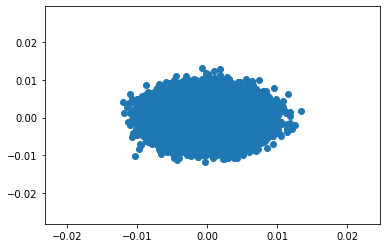

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])


# SVD

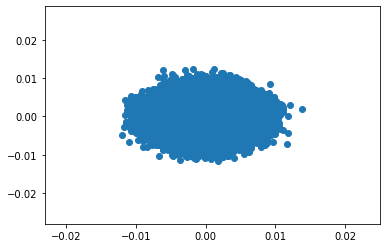

In [18]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=2)

t_svd_vectrs = svd.fit_transform(model.wv.vectors)



plt.scatter(t_svd_vectrs[:,0],t_svd_vectrs[:,1])


# Generlaize Funcion

In [48]:

def embedding_plot(model):

    print('model embedding : ',model.wv.vectors.shape)
    
    svd = TruncatedSVD(n_components=2)
    pca = PCA(n_components = 2,random_state = 101)
    
    t_svd_vectrs = svd.fit_transform(model.wv.vectors)
    
    pca_vectors = pca.fit_transform(model.wv.vectors)
    
    
    
    plt.scatter(pca_vectors[:,0],pca_vectors[:,1])
    plt.title('Pca')
    
    plt.figure()
    plt.scatter(t_svd_vectrs[:,0],t_svd_vectrs[:,1])
    plt.title('svd')
    
    plt.show()



def glove_embeddings(vectors):
    
    svd = TruncatedSVD(n_components=2)
    pca = PCA(n_components = 2,random_state = 101)
    
    t_svd_vectrs = svd.fit_transform(vectors)
    
    pca_vectors = pca.fit_transform(vectors)
    
    
    
    plt.scatter(pca_vectors[:,0],pca_vectors[:,1])
    plt.title('Pca')
    
    plt.figure()
    plt.scatter(t_svd_vectrs[:,0],t_svd_vectrs[:,1])
    plt.title('svd')
    
    plt.show()
    




# Word2Vec 300d trained on colab

model embedding :  (39836, 300)


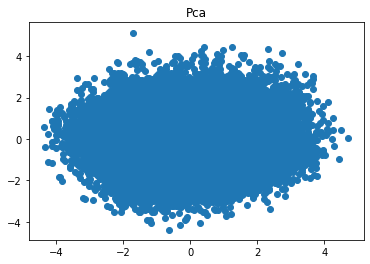

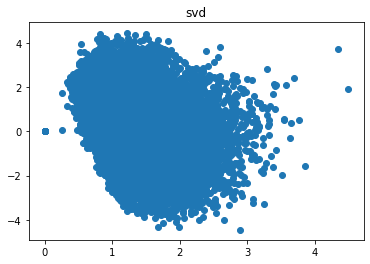

In [23]:


model_300 = Word2Vec.load('word2vec300')
embedding_plot(model_300)


# Visualizing Glove Vectors

In [42]:
def get_embeddings(path):
    
    
    embeddings = {}
    
    file =  open(path,'r',encoding="utf8")
        
    for i in file:
        
        word,vectors = i.split(maxsplit = 1)
        
        embeddings[word] = np.fromstring(vectors,'f',sep = ' ')
        
        
    file.close()
    
    return embeddings
     
glove_100d_embeddings =   get_embeddings('glove.6B.100d.txt')    
    
    

In [43]:
print('vocab size: ',len(glove_100d_embeddings))

vocab size:  400000


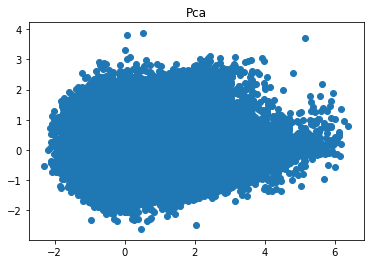

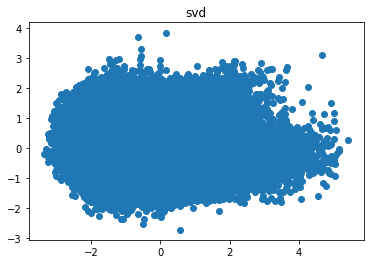

In [49]:

vectors = [vec for word,vec in glove_100d_embeddings.items()]

glove_embeddings(vectors)

In [54]:
data = pd.DataFrame(vectors)

In [57]:
data.to_csv('glove100d_projection.tsv',sep = '\t')